In [1]:
from chebpy import chebfun
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

# General plot parameters
mpl.rcParams['lines.linewidth'] = 1.5
mpl.rcParams['lines.linestyle'] = '-'

mpl.rcParams['font.family'] = 'DejaVu Sans' # this is also the default
mpl.rcParams['font.size'] = 14

mpl.rcParams['xtick.major.size'] = 10
mpl.rcParams['xtick.major.width'] = 2
mpl.rcParams['ytick.major.size'] = 10
mpl.rcParams['ytick.major.width'] = 2

mpl.rcParams['axes.linewidth'] = 2
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.right'] = False

# stating multiple params in one line
mpl.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha": 0.3, "grid.linestyle": "--"})

In [2]:
# oversampled continuous equivalent
t_max = 1.5
fmax = 5

# create a continuous signal
y = chebfun(lambda t : np.sin(2*np.pi*fmax*t), [0, t_max])

# sample the continuous signal
Ts = .001
t = np.arange(0, t_max, Ts)
y_samp = y(t)

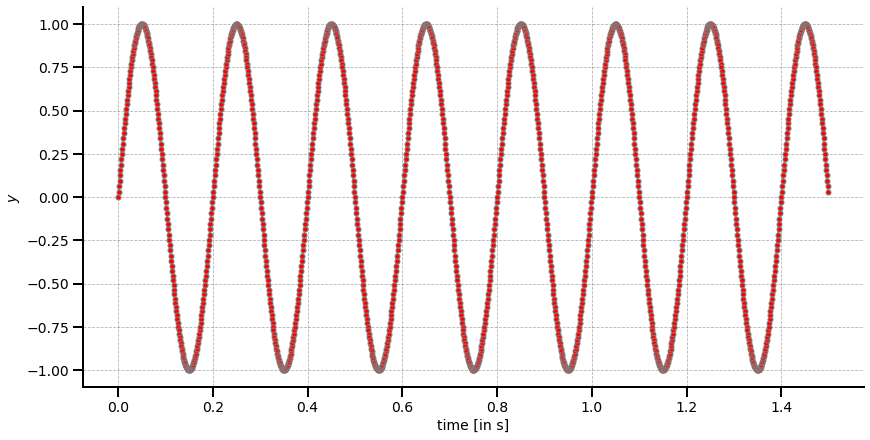

In [3]:
# plotting the data
fig, ax = plt.subplots(figsize=[14,7])

LW = 2
MS = 5

ax.plot(t, y_samp, '-', linewidth=LW, color='grey')
ax.plot(t, y_samp, 'o', markersize=MS, markerfacecolor='red', markeredgecolor='gray')
ax.set_xlabel('time [in s]')
ax.set_ylabel('$y$')
plt.show()

In [4]:
# compute the DFT spectrum 
def nextpower2(n):
    nfft = 1
    while nfft < n:
        nfft = nfft*2
    return nfft

fs = 1/Ts
n = len(y_samp)
nfft = nextpower2(n)

Y = np.fft.rfft(y_samp[:nfft], nfft) # nfft N
faxis = np.arange(0, nfft/2+1) *fs /nfft

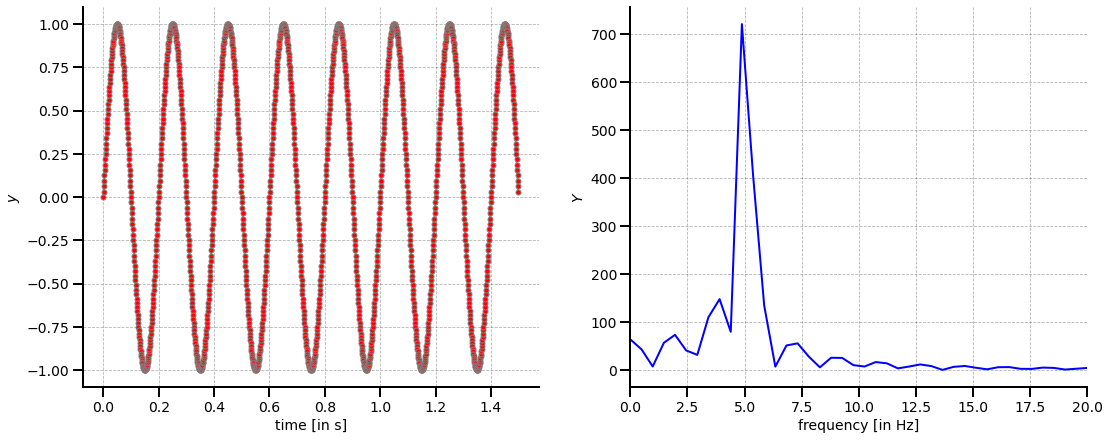

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=[18,7])

LW = 2
MS = 5

ax[0].plot(t, y_samp, '-', linewidth=LW, color='grey')
ax[0].plot(t, y_samp, 'o', markersize=MS, markerfacecolor='red', markeredgecolor='gray')
ax[0].set_xlabel('time [in s]')
ax[0].set_ylabel('$y$')

ax[1].plot(faxis, abs(Y), '-', linewidth=LW, color='blue')
ax[1].set_xlabel('frequency [in Hz]')
ax[1].set_ylabel('$Y$')
ax[1].set_xlim([0,20])

plt.show()